<a href="https://colab.research.google.com/github/RatanakamonS/DADS5001-PART1/blob/main/test_corelation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from tabulate import tabulate
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress
import statsmodels.api as sm

In [3]:
#นำเข้าข้อมูลที่จะวิเคราะห์
df = pd.read_csv('https://raw.githubusercontent.com/RatanakamonS/WOrk/refs/heads/main/db-test.csv')

# แสดงจำนวนฟีเจอร์ทั้งหมด
num_features = df.shape[1]
print(f"จำนวนฟีเจอร์ทั้งหมด: {num_features} ฟีเจอร์")

summary_df = pd.DataFrame({
    'Feature': df.columns,
    'Datatype': [df[col].dtype for col in df.columns],
    'Total Count': [df[col].shape[0] for col in df.columns],
    'Non-Null Count': [df[col].notnull().sum() for col in df.columns],
    'Null Count': [df[col].isnull().sum() for col in df.columns]
})
# แสดงตารางข้อมูล
print(tabulate(summary_df, headers='keys', tablefmt='pretty', showindex=False))

จำนวนฟีเจอร์ทั้งหมด: 6 ฟีเจอร์
+----------------+----------+-------------+----------------+------------+
|    Feature     | Datatype | Total Count | Non-Null Count | Null Count |
+----------------+----------+-------------+----------------+------------+
| Car Production | float64  |     70      |       70       |     0      |
|    Country     | float64  |     70      |       70       |     0      |
|      year      | float64  |     70      |       70       |     0      |
|   Population   | float64  |     70      |       70       |     0      |
|      GDP       | float64  |     70      |       70       |     0      |
| GDP per Capita | float64  |     70      |       70       |     0      |
+----------------+----------+-------------+----------------+------------+


In [4]:
df.head()

,Car Production,Country,year,Population,GDP,GDP per Capita
0,23722890.0,1.0,2014.0,1.371860e+09,1.047562e+13,7636.07
1,24503326.0,1.0,2015.0,1.379860e+09,1.106157e+13,8016.45
2,28118794.0,1.0,2016.0,1.387790e+09,1.123331e+13,8094.39
3,29015440.0,1.0,2017.0,1.396215e+09,1.231049e+13,8817.05
4,27809200.0,1.0,2018.0,1.402760e+09,1.389491e+13,9905.41


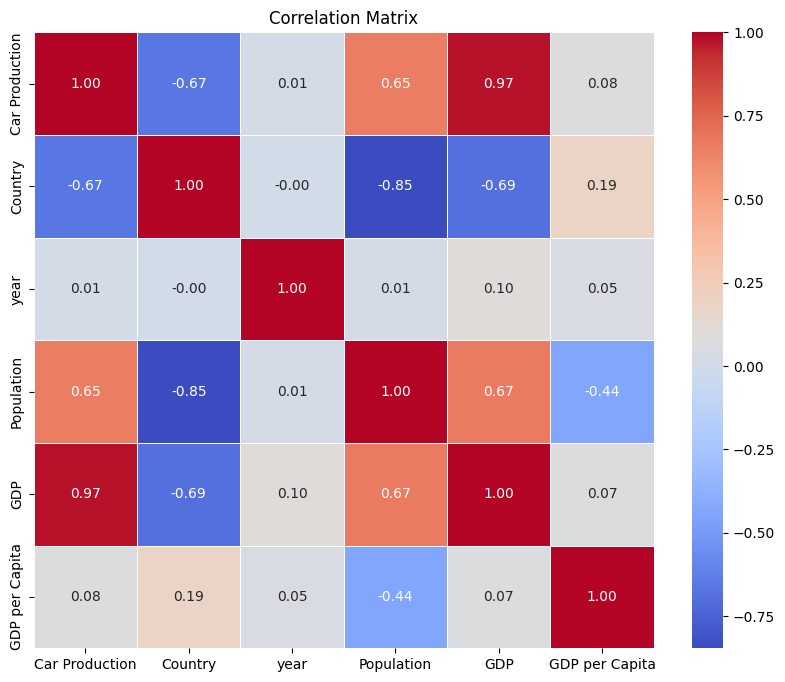

In [5]:
# คำนวณเมทริกซ์ค่าสหสัมพันธ์
correlation_matrix = df.corr()

# สร้างกราฟค่าสหสัมพันธ์
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

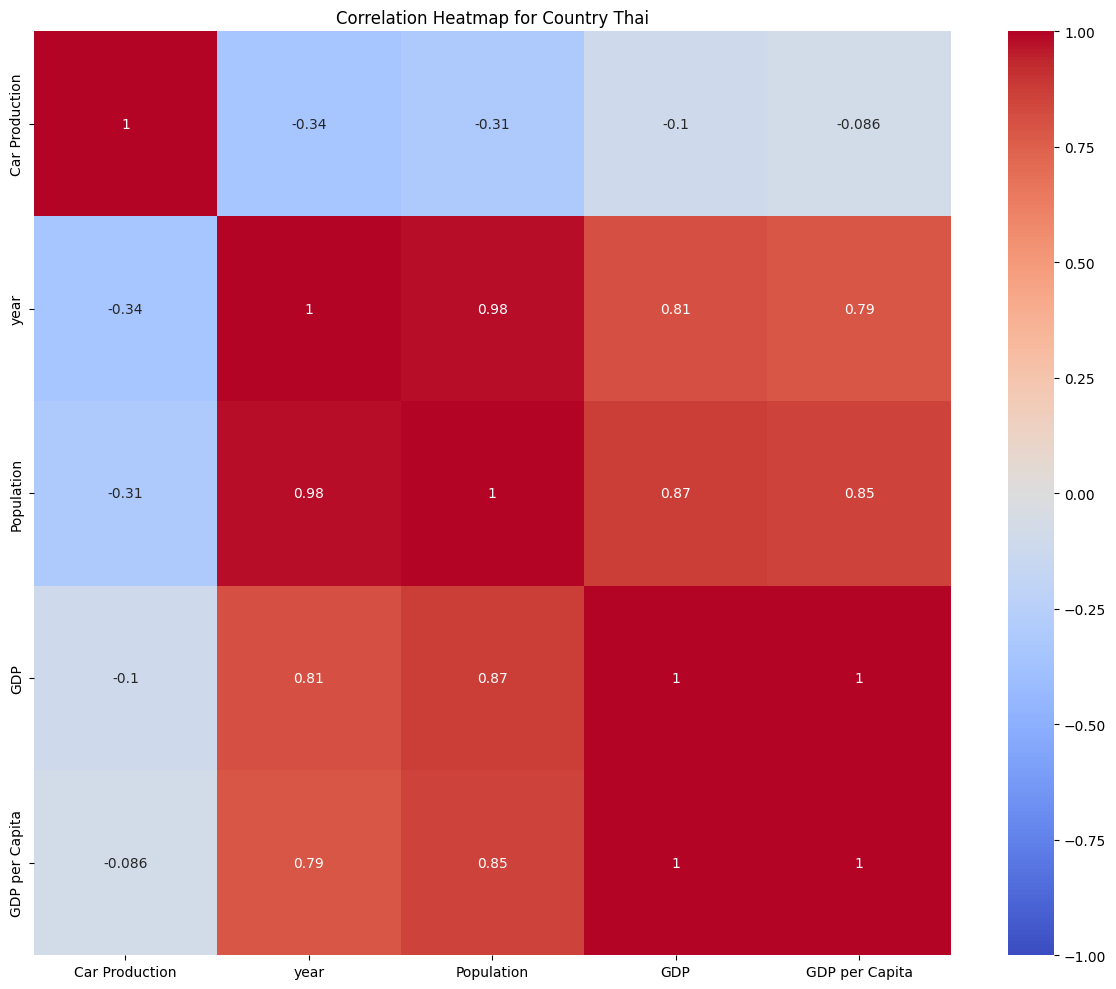

In [6]:
# กรองข้อมูลเฉพาะประเทศไทย Country = 7
df_country_thai = df[df['Country'] == 7]

# ลบคอลัมน์ 'Country' ออกเพื่อไม่ให้มีผลต่อการคำนวณ correlation
df_country_thai = df_country_thai.drop('Country', axis=1)

# คำนวณ correlation
correlation = df_country_thai.corr()

# สร้าง heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap for Country Thai')
plt.tight_layout()
plt.show()